In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import rando

In [2]:
def read_datafile(filename):
    df = pd.read_csv(filename,delimiter='\s+')
    X = df.values
    return X

In [3]:
X = read_datafile('blobs.txt')

In [81]:
class KMeansClustering:
    def __init__(self,K):
        self.K = K
        self.centroids = np.zeros(self.K)

    def SSE(self):
        pass

    def fit(self,X):
        self.X = X
        self.N = len(self.X)
        self.centroids = self.X[np.random.randint(0,len(self.X),self.K)]

        epoch = 0
        while(True):
            prev = self.centroids
            c = np.zeros(self.N)

            for i in range(self.N):
                dists = []
                for j in self.centroids:
                    dist = np.linalg.norm(self.X[i]-j)
                    dists.append(dist)
                c[i] = np.argmin(dists)

            for i in range(self.K):
                indexes = np.where(c==i)[0]
                arr = self.X[indexes]
                self.centroids[i] = arr.mean(axis=0)
            
            if epoch == 100:
                break
            
            else:
                epoch += 1
            

    def plot(self):
        for i in range(self.N):
            plt.scatter(self.X[i][0],self.X[i][1],c='r')
        for k in range(self.K):
            plt.scatter(self.centroids[k][0],self.centroids[k][1],c='b')

In [82]:
model = KMeansClustering(K=2)

In [83]:
model.fit(X)

In [84]:
model.centroids

array([[ 7.21831715,  0.78213112],
       [-6.81708973, -5.72084663]])

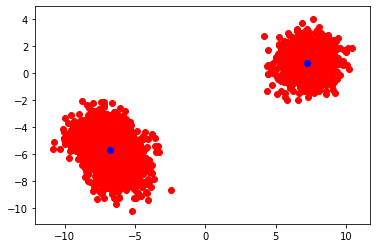

In [85]:
model.plot()